In [8]:
import sys
import matplotlib.pyplot as plt
import time
sys.path.append('../bin/')
from make_figures import *
from classify import *
from utils import *
from load_data import *
from estimate_covariance import *

In [9]:
input_data = 'mnist'
num_classes= 10
DATA_SHAPE = 28*28
num_comp   = [10,15,16,18,20,35,50,200,500,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML','LW','NERCOME']
pca        = True
masks      = [True,False]

In [10]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10

In [11]:
x_train, targets_train, x_test, targets_test, _ = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(50000,) (50000, 784) (10000, 784) (10000,)


In [12]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [13]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,pca=pca)

../outputs/mnist/covariance_estimator/cov_estimate_ML_0_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_1_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_2_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_3_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_4_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_5_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_6_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_7_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_8_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_9_masked.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_0.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_1.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_2.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_3.pkl
../outputs/mnist/covariance_estimator/cov_estimate_ML_4.pkl
../outputs/mnist/covariance_es

True

In [14]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=False)

../outputs/mnist/classification/results_test.pkl ../outputs/mnist/classification/


../outputs/mnist/figures/MLvsPCA_masked_test.png


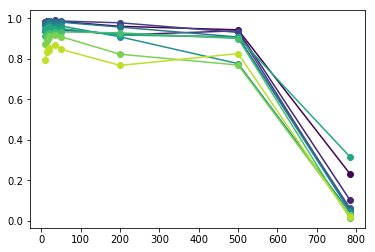

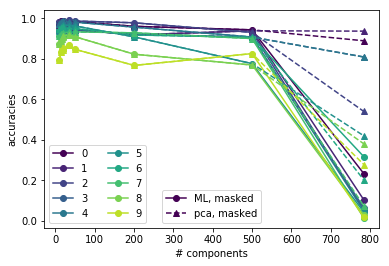

In [18]:
_=make_acc_figure(['ML','pca'],['masked'],results,num_classes,num_comp,plotpath,'MLvsPCA_masked_test.png')

../outputs/mnist/figures/MLvsPCA_inpainted_test.png


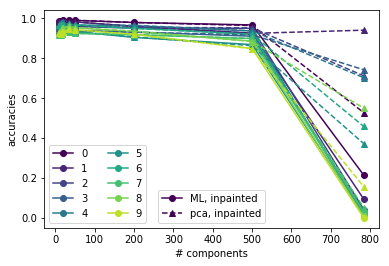

In [19]:
_=make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted_test.png')

../outputs/mnist/figures/MLvsLW_masked_test.png


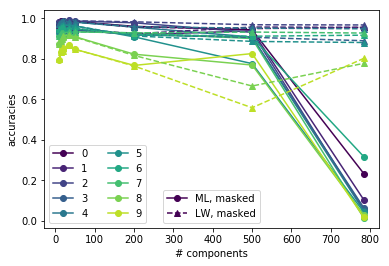

[ 0.93225015  0.94180775  0.94535067  0.94626133  0.94819569  0.94975982
  0.94479324  0.90906539  0.86930324  0.90270025]


In [20]:
_=make_acc_figure(['ML','LW'],['masked'],results,num_classes,num_comp,plotpath,'MLvsLW_masked_test.png')
print(np.mean(results['LW']['masked']['accs'],axis=1))

../outputs/mnist/figures/MLvsLW_inpainted_test.png


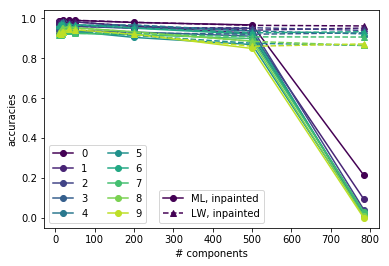

[ 0.94890847  0.95340065  0.95558099  0.95766623  0.95936351  0.96008318
  0.95631936  0.94315407  0.91738103  0.91448247]
[ 0.94878876  0.95326601  0.95570244  0.95745824  0.95946355  0.96007311
  0.95591288  0.94603814  0.92618813  0.90649854]
[ 0.94890847  0.95330155  0.95558099  0.95776534  0.95936801  0.96007656
  0.95583208  0.94125823  0.91154017  0.04639593]
[ 0.93225015  0.94180775  0.94535067  0.94626133  0.94819569  0.94975982
  0.94479324  0.90906539  0.86930324  0.90270025]
[ 0.93164983  0.94220701  0.94545717  0.94582297  0.94837768  0.94953598
  0.94517496  0.90994289  0.8725459   0.8753116 ]


In [21]:
_=make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted_test.png')
print(np.mean(results['LW']['inpainted']['accs'],axis=1))
print(np.mean(results['NERCOME']['inpainted']['accs'],axis=1))
print(np.mean(results['ML']['inpainted']['accs'],axis=1))
print(np.mean(results['LW']['masked']['accs'],axis=1))
print(np.mean(results['NERCOME']['masked']['accs'],axis=1))

../outputs/mnist/figures/LWvsNERCOME_inpainted_test.png


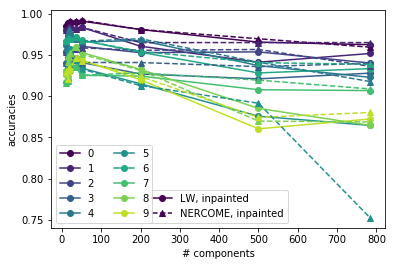

In [22]:
_=make_acc_figure(['LW','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_inpainted_test.png')


../outputs/mnist/figures/LWvsNERCOME_masked_test.png


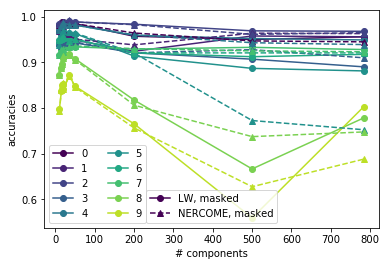

In [23]:
_=make_acc_figure(['LW','NERCOME'],['masked'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_masked_test.png')